<a href="https://colab.research.google.com/github/Arunjagan12/stock-market-prediction-using-ann/blob/main/Stock_market_prediction(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import math
from math import sqrt
from keras.layers import Dense, Dropout, Activation

In [4]:
def get_stock_data(normalized=0):
    url = "EDELWEISSNS.csv"
    col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    stocks = pd.read_csv(url, header=0, names=col_names)
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    return df

In [5]:
df = get_stock_data(0)
df.head()

<ipython-input-4-35126cabdc61>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Year'], df['Month'], df['Day'] = date_split


,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2008-10-03,41.299999,41.685001,39.400002,40.525002,0.002930,185090.0,2008,10,03
1,2008-10-06,39.700001,40.799999,37.200001,39.564999,0.002860,204340.0,2008,10,06
2,2008-10-07,40.000000,40.599998,36.000000,36.119999,0.002611,128970.0,2008,10,07
3,2008-10-08,35.000000,44.400002,34.500000,40.880001,0.002955,700490.0,2008,10,08
4,2008-10-10,40.400002,40.400002,35.299999,37.910000,0.002741,367380.0,2008,10,10


In [6]:
df.drop(df.columns[[0,3,6, 7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,41.299999,41.685001,40.525002,0.002930
1,39.700001,40.799999,39.564999,0.002860
2,40.000000,40.599998,36.119999,0.002611
3,35.000000,44.400002,40.880001,0.002955
4,40.400002,40.400002,37.910000,0.002741


In [7]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

       Open     High    Close    Volume
0     0.413  0.41685  0.40525  0.292964
1     0.397  0.40800  0.39565  0.286023
2     0.400  0.40600  0.36120  0.261119
3     0.350  0.44400  0.40880  0.295530
4     0.404  0.40400  0.37910  0.274059
...     ...      ...      ...       ...
2462  2.180  2.21000  2.18550  2.185500
2463  2.215  2.21500  2.12150  2.121500
2464  2.132  2.14450  1.89400  1.894000
2465  1.914  1.98850  1.89500  1.895000
2466  1.890  1.90900  1.87000  1.870000

[2467 rows x 4 columns]


In [8]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [9]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1973, 3)
y_train (1973, 1)
X_test (494, 3)
y_test (494, 1)


In [12]:
#Compiling and training the neural network model
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
15/15 [==============================] - 1s 16ms/step - loss: 0.1822 - val_loss: 0.8114
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1632 - val_loss: 0.7483
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1363 - val_loss: 0.6435
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0984 - val_loss: 0.4831
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0532 - val_loss: 0.2866
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.1252
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0657
Epoch 8/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0707
Epoch 9/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.0821
Epoch 10/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0055 - val_loss: 0.0777


In [13]:
#Predicted Values
predictions = classifier.predict(X_test)
print(predictions[:10])

16/16 [==============================] - 0s 3ms/step
[[0.7834474 ]
 [0.7806058 ]
 [0.77594817]
 [0.7810843 ]
 [0.7756941 ]
 [0.7727454 ]
 [0.76371795]
 [0.7651115 ]
 [0.7656545 ]
 [0.7904907 ]]


In [14]:
#Calculating the error in the trained Neural Network model
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.09 RMSE)
Test Score: 1.13 MSE (1.06 RMSE)


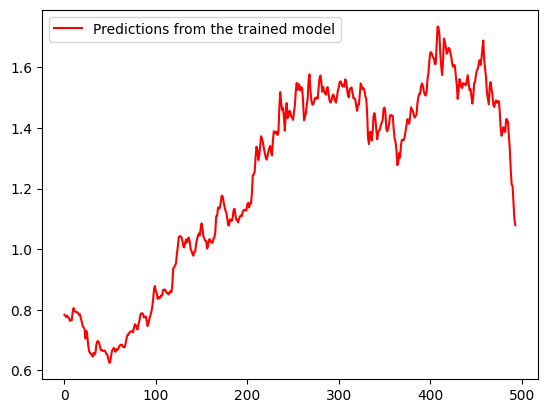

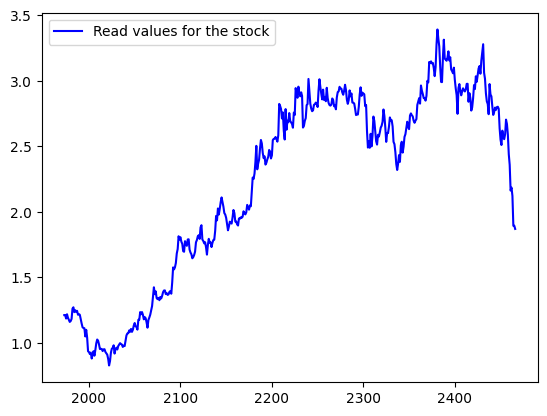

In [15]:
#Prediction vs real results
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()